Observation:
Type: Box(2)


Num    Observation              Min            Max


0      Car Position              -1.2           0.6


1      Car Velocity              -0.07          0.07


Actions:
    Type: Discrete(3)
    Num    Action
    0      Accelerate to the Left
    1      Don't accelerate
    2      Accelerate to the Right

In [1]:
import gym
env = gym.make('MountainCar-v0')


In [2]:
import tensorflow as tf
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu="")
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices("TPU"))

strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.104.240.58:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.104.240.58:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

In [4]:
!pip install keras-rl2

from rl.memory import SequentialMemory
from rl.policy import BoltzmannQPolicy
from rl.agents import DQNAgent

model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(env.action_space.n, activation="linear"))

dqn = DQNAgent(
    model=model, 
    nb_actions=env.action_space.n, 
    memory=SequentialMemory(limit=50000, window_length=1), 
    nb_steps_warmup=10,
    target_model_update=1e-2, 
    policy=BoltzmannQPolicy())

dqn.compile(Adam(lr=1e-3), metrics=['mae'])
history_single = dqn.fit(env, nb_steps=300000, visualize=False, verbose=2)

Training for 300000 steps ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


    200/300000: episode: 1, duration: 2.170s, episode steps: 200, steps per second:  92, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.140 [0.000, 2.000],  loss: 0.047220, mae: 0.917146, mean_q: -1.238412
    400/300000: episode: 2, duration: 1.799s, episode steps: 200, steps per second: 111, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.000 [0.000, 2.000],  loss: 0.005420, mae: 1.905265, mean_q: -2.822190
    600/300000: episode: 3, duration: 1.780s, episode steps: 200, steps per second: 112, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.010 [0.000, 2.000],  loss: 0.025026, mae: 3.045906, mean_q: -4.496369
    800/300000: episode: 4, duration: 1.793s, episode steps: 200, steps per second: 112, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.975 [0.000, 2.000],  loss: 0.068641, mae: 4.208888, mean_q: -6.206635
   1000/300000: episode: 5, duration: 1.821s, ep

In [5]:
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(env.action_space.n, activation="linear"))

dqn = DQNAgent(
    model=model, 
    nb_actions=env.action_space.n, 
    memory=SequentialMemory(limit=50000, window_length=1), 
    nb_steps_warmup=10,
    target_model_update=1e-2, 
    policy=BoltzmannQPolicy(),
    enable_double_dqn=True)

dqn.compile(Adam(lr=1e-3), metrics=['mae'])
history_double = dqn.fit(env, nb_steps=300000, visualize=False, verbose=2)

Training for 300000 steps ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


    200/300000: episode: 1, duration: 2.509s, episode steps: 200, steps per second:  80, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.015 [0.000, 2.000],  loss: 0.077266, mae: 0.829189, mean_q: -1.079105
    400/300000: episode: 2, duration: 1.948s, episode steps: 200, steps per second: 103, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.005 [0.000, 2.000],  loss: 0.006287, mae: 1.821189, mean_q: -2.685626
    600/300000: episode: 3, duration: 1.908s, episode steps: 200, steps per second: 105, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.075 [0.000, 2.000],  loss: 0.020334, mae: 2.941657, mean_q: -4.344371
    800/300000: episode: 4, duration: 1.942s, episode steps: 200, steps per second: 103, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.950 [0.000, 2.000],  loss: 0.039558, mae: 4.094830, mean_q: -6.060324
   1000/300000: episode: 5, duration: 1.989s, ep

1506


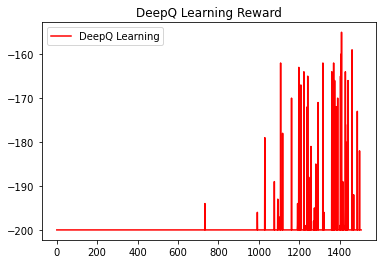

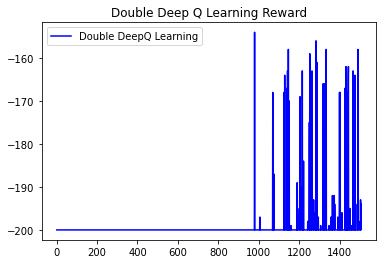

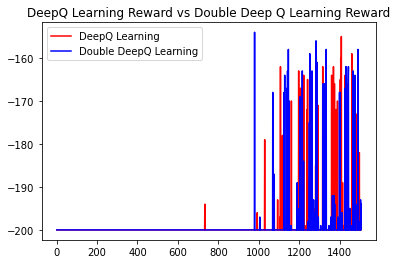

In [13]:
import numpy as np
import matplotlib.pyplot as plt

episodes = range(1, len(history_single.history["episode_reward"]) + 1)
double_episodes = range(1, len(history_double.history["episode_reward"]) + 1)
print(len(double_episodes))
plt.title("DeepQ Learning Reward")
plt.plot(episodes, history_single.history["episode_reward"], "r", label="DeepQ Learning")
plt.legend()
plt.show()

plt.title("Double Deep Q Learning Reward")
plt.plot(double_episodes, history_double.history["episode_reward"], "b", label="Double DeepQ Learning")
plt.legend()
plt.show()

plt.title("DeepQ Learning Reward vs Double Deep Q Learning Reward")
plt.plot(episodes, history_single.history["episode_reward"], "r", label="DeepQ Learning")
plt.plot(double_episodes, history_double.history["episode_reward"], "b", label="Double DeepQ Learning")
plt.legend()
plt.show()


In [14]:
print(history_single.history.keys())

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])
